### Импорт библиотек

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

## Задание 1

Выбрать себе датасет (который интересен или нравится больше всего)


Kaggle Dataset - HR Analytics: Job Change of Data Scientists:

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

### Постановка задачи

 Предсказать вероятность смены работы по характеристикам сотрудника.

Описание датасета

enrollee_id - Идентификатор участника

city - Город

city_development_index - Городской индекс развития

gender - Пол

relevent_experience - Ревелантный опыт

enrolled_university - Зачислен в вуз

education_level - Уровень образования

major_discipline - Основная дисциплина

experience - Опыт

company_size - Размер компании

company_type - Тип компании

last_new_job - Последняя работа

training_hours - Тренировки часы

target - Цель


In [31]:
train=pd.read_csv("./aug_train.csv")
test=pd.read_csv("./aug_test.csv")

In [32]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Посмотрим общие данные датасета.


In [33]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

В этом наборе данных много нулевых значений, поэтому мы сначала проверим форму, можем ли мы напрямую удалить все строки с пустыми значениями, а затем проверим, достаточно ли этого для прогнозирования тестовых данных.

In [34]:
train.shape

(19158, 14)

In [35]:
train=train.dropna()

In [36]:
train=train.reset_index(drop=True)

In [37]:
train.shape

(8955, 14)

Теперь мы проверим тестовый набор данных, можно ли его предсказать по количеству значений в наборе обучающих данных.

In [38]:
test.shape

(2129, 13)

In [39]:
test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

Мы не можем удалить нулевые значения в тестовом наборе данных, поскольку отправляемый файл содержит то же количество значений, которые необходимо предсказать. Итак, нам нужно будет заполнить пустые значения в тестовом наборе данных.

In [40]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


Заполним столбец "Пол"

In [41]:
print(test['gender'].mode())

0    Male
Name: gender, dtype: object


In [42]:
test['gender'].fillna(value='Male',inplace=True)

Заполнение столбца enrolled_university 

In [43]:
test['enrolled_university'].mode()

0    no_enrollment
Name: enrolled_university, dtype: object

In [44]:
test['enrolled_university'].fillna(value='no_enrollment',inplace=True)

Заполним education_level

In [45]:
test['education_level'].mode()

0    Graduate
Name: education_level, dtype: object

In [46]:
test['education_level'].fillna(value='Graduate',inplace=True)

Заполним major_discipline

In [47]:
test['major_discipline'].mode()


0    STEM
Name: major_discipline, dtype: object

In [48]:
test['major_discipline'].fillna(value='STEM',inplace=True)

Запоним experience



In [49]:
test['experience'].mode()

0    >20
Name: experience, dtype: object

In [50]:
test['experience'].fillna(value='>20',inplace=True)

Заполним company size

In [51]:
test['company_size'].mode()

0    50-99
Name: company_size, dtype: object

In [53]:
test['company_size'].fillna(value='50-99',inplace=True)

Заполняем company_type

In [54]:
test['company_type'].mode()

0    Pvt Ltd
Name: company_type, dtype: object

In [55]:
test['company_type'].fillna(value='Pvt Ltd',inplace=True)

Запоняем last new job

In [56]:
test['last_new_job'].mode()

0    1
Name: last_new_job, dtype: object

In [57]:
test['last_new_job'].fillna(value='1',inplace=True)

In [58]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

Теперь в наборе данных train и test нет пустых значений.

## Задание 2

Сделать обзорный анализ выбранного датасета.

### Визуализация данных

In [59]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


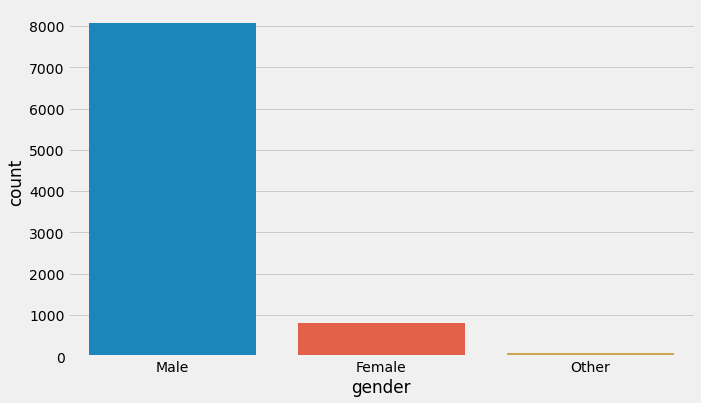

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(train['gender'])
plt.show()

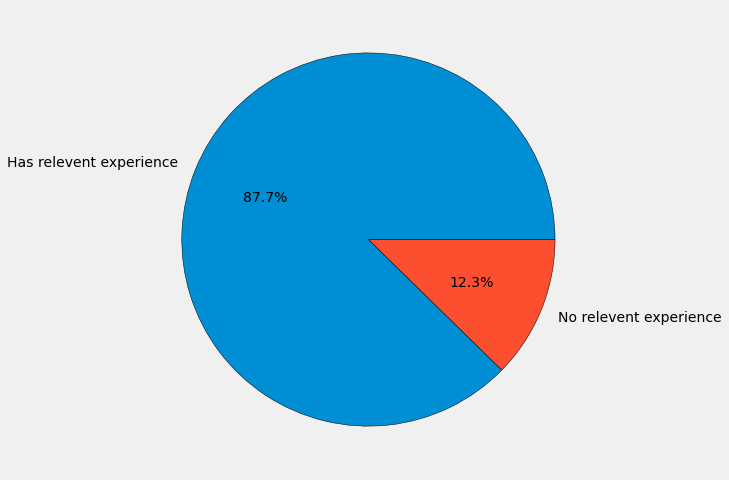

In [62]:
index=train['relevent_experience'].value_counts().index
values=train['relevent_experience'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.show()

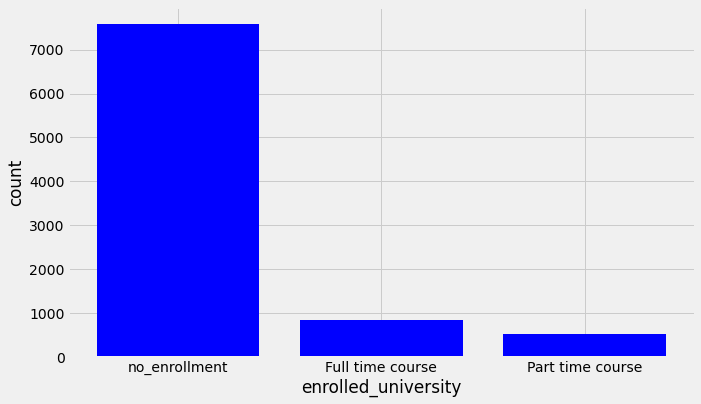

In [65]:
index=train['enrolled_university'].value_counts().index
values=train['enrolled_university'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(index, values, color ='blue')
plt.xlabel("enrolled_university")
plt.ylabel("count")
plt.show()

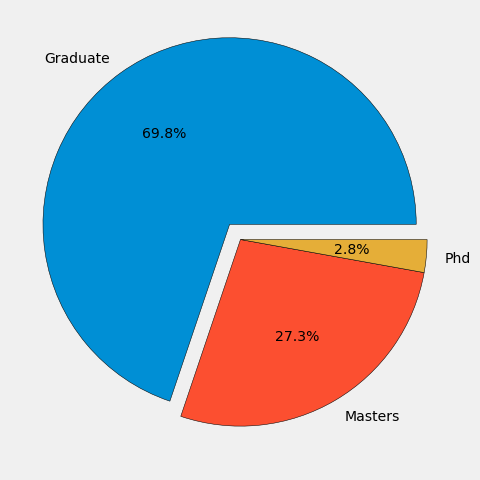

In [66]:
index=train['education_level'].value_counts().index
values=train['education_level'].value_counts()
plt.figure(figsize=(16,8))
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'},explode=[0.1,0,0])
plt.show()

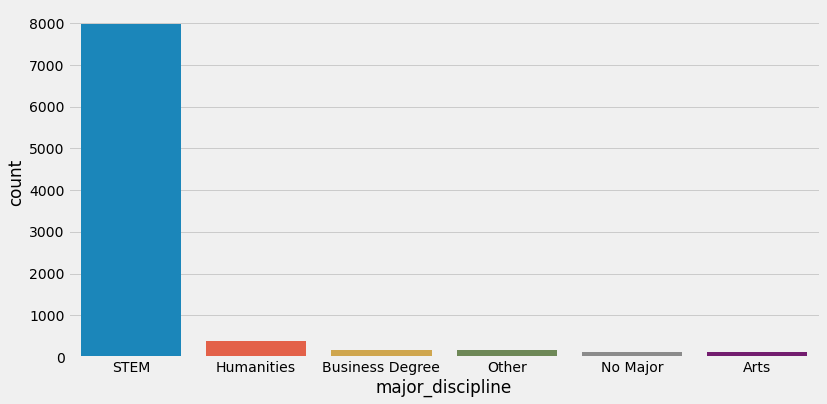

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64


In [67]:
plt.figure(figsize=(12,6))
sns.countplot(train['major_discipline'])
plt.show()
print(train['major_discipline'].value_counts())

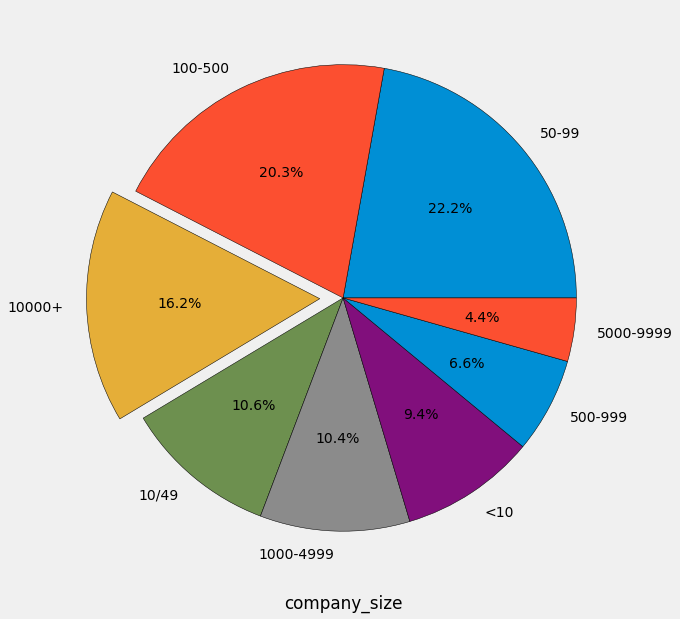

In [68]:
index=train['company_size'].value_counts().index
values=train['company_size'].value_counts()
plt.figure(figsize=(18,10))
plt.xlabel('company_size')
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"},explode=[0,0,0.1,0,0,0,0,0])
plt.show()

Собираем вместе заполнение пропусков и трансформации.

SimpleImputer возвращает данные в numpy.ndarray, поэтому нужно снова создать датафрейм, чтобы выбирать по столбцам признаков.

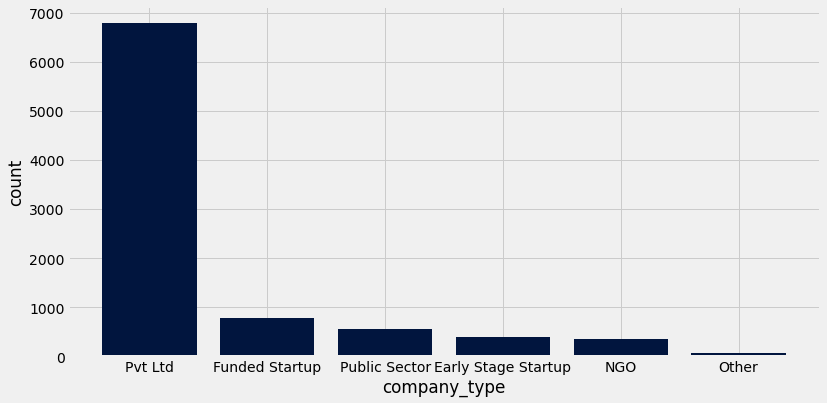

In [69]:
index=train['company_type'].value_counts().index
values=train['company_type'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(index, values, color ='#01153E')
plt.xlabel("company_type")
plt.ylabel("count")
plt.show()

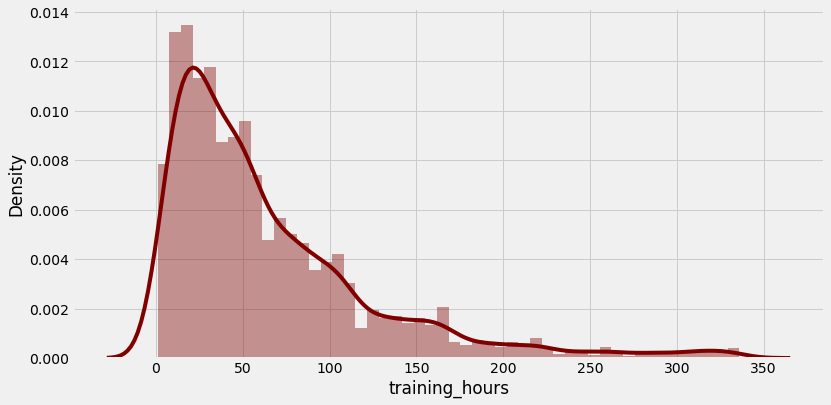

In [70]:
plt.figure(figsize=(12,6))
sns.distplot(train['training_hours'],color='maroon')
plt.show()

In [71]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [72]:
train['experience'].value_counts()

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
8       398
15      398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64

Это просто кол-во лет опыта работы. Можно заменить ">20" на 21, "<1" на 0, получится вполне неплохо.

In [73]:
exp_20=train.loc[train['experience']=='>20']

In [74]:
exp_20.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0.0
11,14928,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,3,40,0.0
13,26966,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,>4,82,0.0
16,10164,city_114,0.926,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,100-500,Pvt Ltd,4,42,1.0


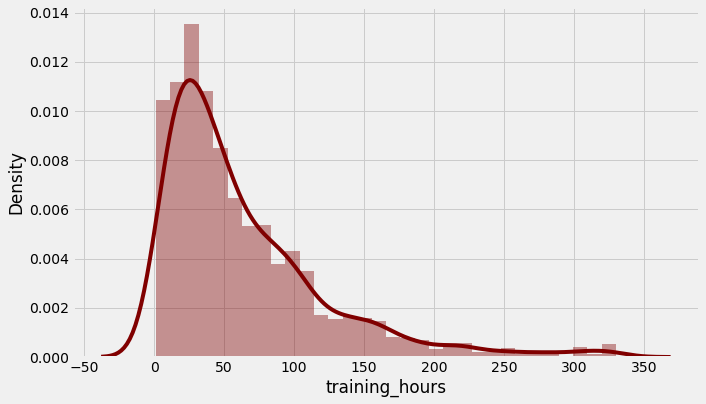

In [76]:
plt.figure(figsize=(10,6))
sns.distplot(exp_20['training_hours'],color='maroon')
plt.show()

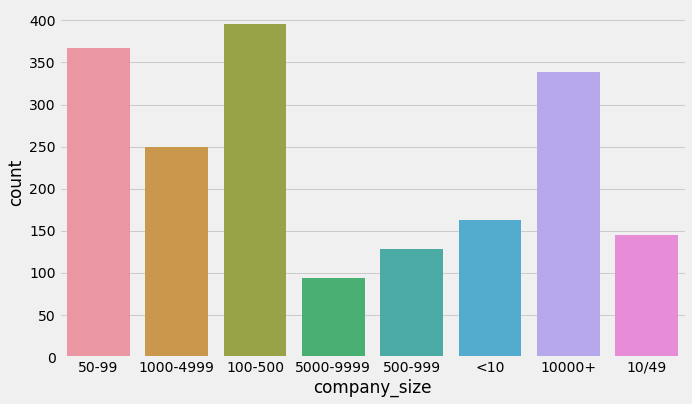

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(exp_20['company_size'])
plt.show()

Мы можем видеть, что люди, у которых опыт работы превышает 20 лет, даже в небольшой компании имеют самый высокий размер, а также можем видеть, что в компании с размером более 10000 человек больше.

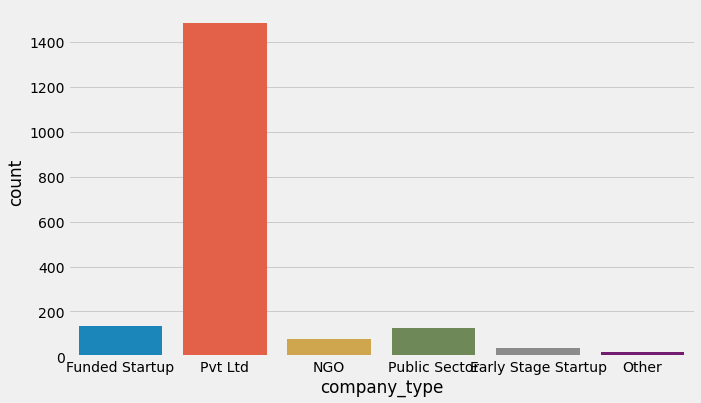

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(exp_20['company_type'])
plt.show()

In [80]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


Изменяем целевую переменную на целое число.

Сравнение характеристик с целевыми.
0-Не ищу смены работы , 1 -Ищу смену работы

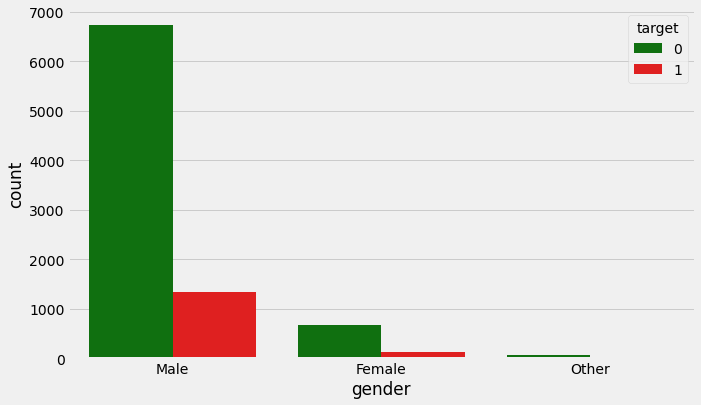

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender",hue="target",data=train,palette=['green',"red"])
plt.show()

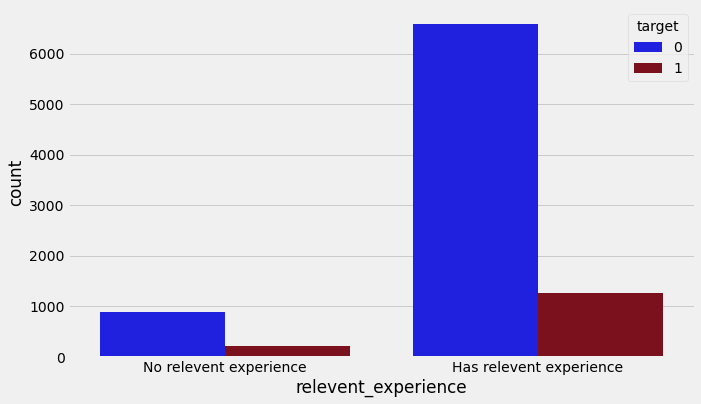

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(x="relevent_experience",hue="target",data=train,palette=['blue',"#8C000F"])
plt.show()

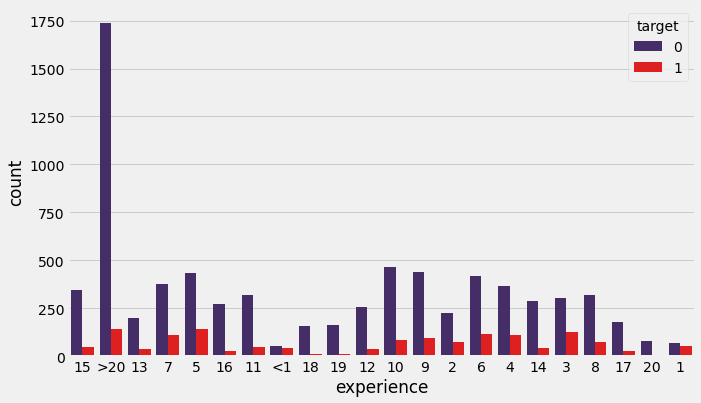

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(x="experience",hue="target",data=train,palette=['#432371',"red"])
plt.show()

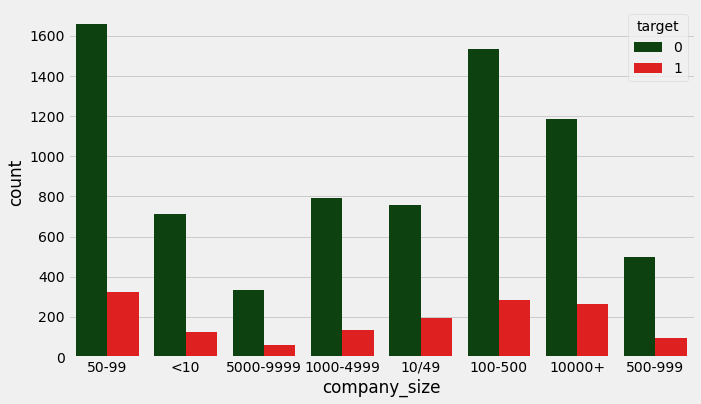

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(x="company_size",hue="target",data=train,palette=['#054907',"red"])
plt.show()

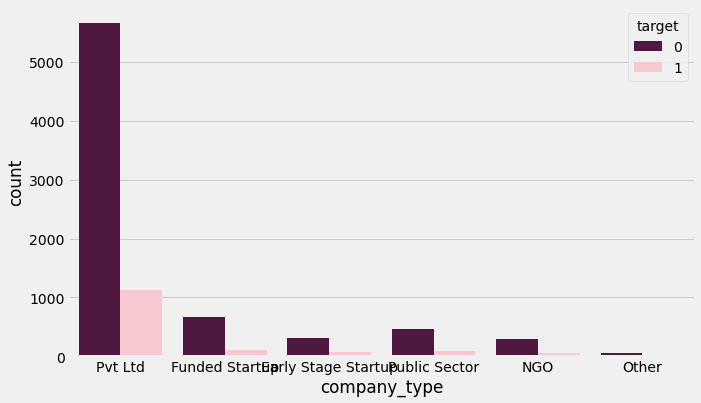

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(x="company_type",hue="target",data=train,palette=['#580F41',"#FFC0CB"])
plt.show()

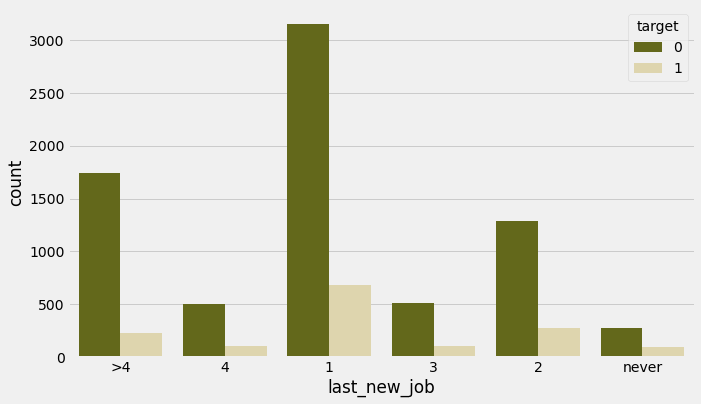

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(x="last_new_job",hue="target",data=train,palette=['#6E750E',"#E6DAA6"])
plt.show()

In [91]:
train['relevent_experience']=train['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

Теперь мы будем использовать get_dummies для тех столбцов, которые имеют более 2 категориальных значений, поскольку это работает более точно, когда мы прогнозируем наши значения, поскольку наша цель состоит из 2 категориальных значений.

In [92]:
dummies=pd.get_dummies(train[['enrolled_university']])
train = pd.concat([train.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [93]:
dummies=pd.get_dummies(train[['gender']])
train = pd.concat([train.drop(['gender'],axis=1), dummies],axis=1)

In [94]:
train=train.drop("education_level",axis=1)

In [95]:
dummies=pd.get_dummies(train[['major_discipline']])
train = pd.concat([train.drop(['major_discipline'],axis=1), dummies],axis=1)

In [96]:
dummies=pd.get_dummies(train[['experience']])
train = pd.concat([train.drop(['experience'],axis=1), dummies],axis=1)

In [97]:
dummies=pd.get_dummies(train[['company_size']])
train = pd.concat([train.drop(['company_size'],axis=1), dummies],axis=1)

In [98]:
dummies=pd.get_dummies(train[['company_type']])
train = pd.concat([train.drop(['company_type'],axis=1), dummies],axis=1)

In [99]:
dummies=pd.get_dummies(train[['last_new_job']])
train = pd.concat([train.drop(['last_new_job'],axis=1), dummies],axis=1)

Аналогично в тестовом наборе данных

In [100]:
test['relevent_experience']=test['relevent_experience'].replace({'No relevent experience':0,'Has relevent experience':1})

In [101]:
dummies=pd.get_dummies(test[['gender']])
test = pd.concat([test.drop(['gender'],axis=1), dummies],axis=1)

In [102]:
dummies=pd.get_dummies(test[['enrolled_university']])
test = pd.concat([test.drop(['enrolled_university'],axis=1), dummies],axis=1)

In [103]:
test=test.drop("education_level",axis=1)

In [104]:
dummies=pd.get_dummies(test[['major_discipline']])
test = pd.concat([test.drop(['major_discipline'],axis=1), dummies],axis=1)

In [105]:
dummies=pd.get_dummies(test[['experience']])
test = pd.concat([test.drop(['experience'],axis=1), dummies],axis=1)

In [106]:
dummies=pd.get_dummies(test[['company_size']])
test = pd.concat([test.drop(['company_size'],axis=1), dummies],axis=1)

In [107]:
dummies=pd.get_dummies(test[['company_type']])
test = pd.concat([test.drop(['company_type'],axis=1), dummies],axis=1)

In [108]:
dummies=pd.get_dummies(test[['last_new_job']])
test = pd.concat([test.drop(['last_new_job'],axis=1), dummies],axis=1)

In [109]:
print(train.shape)
print(test.shape)

(8955, 60)
(2129, 59)


Обучим нашу модель

In [110]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'training_hours', 'target', 'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'gender_Female', 'gender_Male',
       'gender_Other', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'experience_1', 'experience_10',
       'experience_11', 'experience_12', 'experience_13', 'experience_14',
       'experience_15', 'experience_16', 'experience_17', 'experience_18',
       'experience_19', 'experience_2', 'experience_20', 'experience_3',
       'experience_4', 'experience_5', 'experience_6', 'experience_7',
       'experience_8', 'experience_9', 'experience_<1', 'experience_>20',
       'company_size_10/49', 'company_size_100-500', 'company_size_1000-4999',
       'company_size_10000+

In [111]:
X=train.drop(['enrollee_id','city','target'],axis=1)
y=train[['target']]

In [112]:
import sklearn
from sklearn.model_selection import train_test_split

Разделим на test и train

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [114]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6268, 57)
(6268, 1)
(2687, 57)
(2687, 1)


Логистическая регрессия

In [115]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [116]:
model.fit(X_train,y_train)

LogisticRegression()

In [117]:
predictions=model.predict(X_test)

In [118]:
model.score(X_test,y_test)

0.8395980647562337

Дерево решений

In [119]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()

In [120]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [121]:
predictions_2=model_2.predict(X_test)

In [122]:
model_2.score(X_test,y_test)

0.7759583178265724

Случайный лес

In [123]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()

In [124]:
model_3.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
predictions_3=model_3.predict(X_test)

In [126]:
model_3.score(X_test,y_test)

0.847785634536658

KNC

In [127]:
from sklearn.neighbors import KNeighborsClassifier
model_4=KNeighborsClassifier()

In [128]:
model_4.fit(X_train,y_train)

KNeighborsClassifier()

In [129]:
predictions_4=model_4.predict(X_test)

In [130]:
model_4.score(X_test,y_test)

0.8228507629326386

SVM

In [131]:
from sklearn.svm import SVC

In [132]:
model_5=SVC()

In [133]:
model_5.fit(X_train,y_train)

SVC()

In [134]:
predictions_5=model_5.predict(X_test)

In [135]:
model_5.score(X_test,y_test)

0.8373650911797543

Итак, максимальный балл в прогнозировании получает классификатор случайных лесов. Теперь мы спрогнозируем нашу целевую переменную, используя этот алгоритм.

In [136]:
test=test.drop(['enrollee_id','city'],axis=1)

In [137]:
model_3.fit(X,y)

RandomForestClassifier()

In [138]:
final_predictions=model_3.predict(test)

In [139]:
final_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
with np.printoptions(threshold=np.inf):
    print(final_predictions)

[0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 

Итак, в конце мы получили наши окончательные прогнозы, и, согласно полученным данным, мы узнали, что многие люди не стремились сменить работу. Они хотели остаться на той же работе.